_A Jupyter Notebook from my scipython blog at https://scipython.com/blog/exb-drift-for-constant-crossed-electric-and-magnetic-fields/_

# E x  B drift for constant crossed electric and magnetic fields

Consider a particle of charge $q$ and mass $m$ moving in a constant magnetic field, $\boldsymbol{B} = (0, 0, B_z)$ perpendicular to a constant electric field, $\boldsymbol{E} = (0, E_y, 0)$. The equation of motion is given by the Lorentz equation,
$$
m\ddot{\boldsymbol{r}} = q(\boldsymbol{E} + \dot{\boldsymbol{r}} \times \boldsymbol{B}).
$$
In component form, with the definition $\Omega = qB_z/m$, we have
$$
\begin{align}
\ddot{x} &= \Omega\dot{y},\\
\ddot{y} &= \frac{eE_y}{m} - \Omega\dot{x},\\
\ddot{z} &= 0.
\end{align}
$$
If the particle's initial velocity is perpendicular to the magnetic field, $\boldsymbol{v} = (v_\perp, 0, 0)$, these can be integrated by standard methods to yield:
$$
\begin{align}
\dot{x} &= \left( v_\perp - \frac{E_y}{B_z}\right)\cos \Omega t + \frac{E_y}{B_z},\\
\dot{y} &= \left( v_\perp - \frac{E_y}{B_z}\right)\sin \Omega t,\\
\dot{z} &= 0.
\end{align}
$$
and
$$
\begin{align}
x &= \frac{1}{\Omega}\left( v_\perp - \frac{E_y}{B_z}\right)\sin \Omega t + \frac{E_y}{B_z}t,\\
y &= \frac{1}{\Omega}\left( v_\perp - \frac{E_y}{B_z}\right)\left(1 - \cos \Omega t \right),\\
z &= 0.
\end{align}
$$

There is therefore a drift along the $x$-axis of speed $E_y/B_z$. More generally, this drift velocity is equal to $(\boldsymbol{E}\times\boldsymbol{B})/B^2$ and is known as the $\boldsymbol{E}\times\boldsymbol{B}$ drift.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# Setup a time grid on which to treat the particle's motion.
dt = 0.001
N = 1000
tmax = N*dt
t = np.linspace(0,tmax,N)

In [3]:
# particle mass, charge and charge/mass ratio.
m, q = 0.01, 1
qom = q / m

# The magnetic and electric fields are (0,0,Bz) and (0,Ey,0)
Bz = 0.4
Ey = 0.7

# The particle starts at (0,0) with initial velocity perpendicular to the
# magnetic field, vy0
vy0 = 7.5

In [4]:
# The gyrofrequency, qB/m.
Omega = qom * Bz

x = (vy0 - Ey/Bz) / Omega * np.sin(Omega * t) + Ey/Bz * t
y = (vy0 - Ey/Bz) / Omega * (1 - np.cos(Omega * t))

In [5]:
def add_field_annotations(ax):
    """Indicate the electric field with a single arrow."""
    
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    Dx, Dy = xmax - xmin, ymax - ymin
    xpf, ypf = 0.05, 0.07
    axmin = xmin + xpf*Dx
    aymin, aymax = ymin + ypf*Dy, ymax - ypf*Dy
    adx, ady = 0, aymax-aymin
    ax.arrow(axmin, aymin, adx, ady, head_width=Dx*0.03, head_length=Dy*0.07,
             length_includes_head=True, facecolor='k', lw=3)
    # Add labels for the electric and magnetic fields.
    ax.text(s='E',  x=axmin+xpf*Dx*0.5, y=aymax-ypf*Dy, fontsize=18, fontweight='bold',
            fontstyle='italic')
    ax.text(s='B',  x=xmax-0.05*Dx, y=aymax-0.05*Dy, fontsize=18, fontweight='bold',
            fontstyle='italic', color='gray')

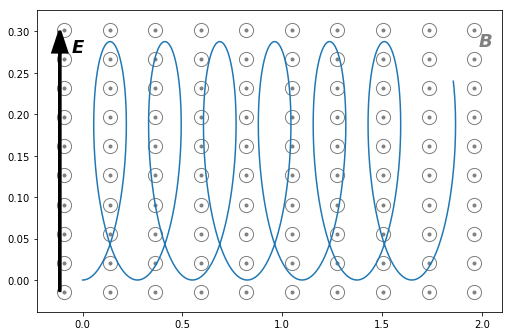

In [6]:
width, height, DPI = 600, 400, 72
fig = plt.figure(figsize=(width/DPI, height/DPI))
ax = fig.add_subplot(111)
ax.plot(x, y)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
cX, cY = np.linspace(xmin,xmax,10), np.linspace(ymin,ymax,10)
cX, cY = np.meshgrid(cX, cY)
# Draw markers representing the magnetic field coming out of the plane of the plot.
ax.scatter(cX, cY, marker='o', edgecolors='gray', s=200, c='white')
ax.scatter(cX, cY, marker='.', c='gray')
# Add an arrow representing the electric field.
add_field_annotations(ax)
plt.show()